In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [7]:
df = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
df.columns=df.columns.str.lower().str.replace(" ","_").str.replace("- ","_")
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [ ]:
df.to_csv("superstore_cleaned.csv", index=False)

In [2]:
!pip install mysql-connector-python

In [3]:
import mysql.connector

In [4]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",          
    password="130054", 
    database="ecommerce_analysis"
)

print("Connected successfully!")


Connected successfully!


In [12]:
query="""
SELECT 
    YEAR(order_date) AS year,
    MONTH(order_date) AS month,
    SUM(sales) AS total_sales,
    SUM(profit) AS total_profit
FROM superstore
GROUP BY year, month
ORDER BY year, month;
"""
df1=pd.read_sql_query(query,conn)
df1.head()

C:\Users\tanus\AppData\Local\Temp\ipykernel_17224\1578463248.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1=pd.read_sql_query(query,conn)


,year,month,total_sales,total_profit
0,2014,1,14161.35,2416.68
1,2014,2,4119.84,781.84
2,2014,3,55526.23,419.42
3,2014,4,28139.56,3450.98
4,2014,5,23634.66,2732.61


In [13]:
df1.dtypes

year              int64
month             int64
total_sales     float64
total_profit    float64
dtype: object

In [22]:
df1['date'] = pd.to_datetime(
    df1['year'].astype(str) + '-' + 
    df1['month'].astype(str).str.zfill(2) + 
    '-01'
)
df1 = df1.sort_values('date')
df1.head()


,year,month,total_sales,total_profit,date
0,2014,1,14161.35,2416.68,2014-01-01
1,2014,2,4119.84,781.84,2014-02-01
2,2014,3,55526.23,419.42,2014-03-01
3,2014,4,28139.56,3450.98,2014-04-01
4,2014,5,23634.66,2732.61,2014-05-01


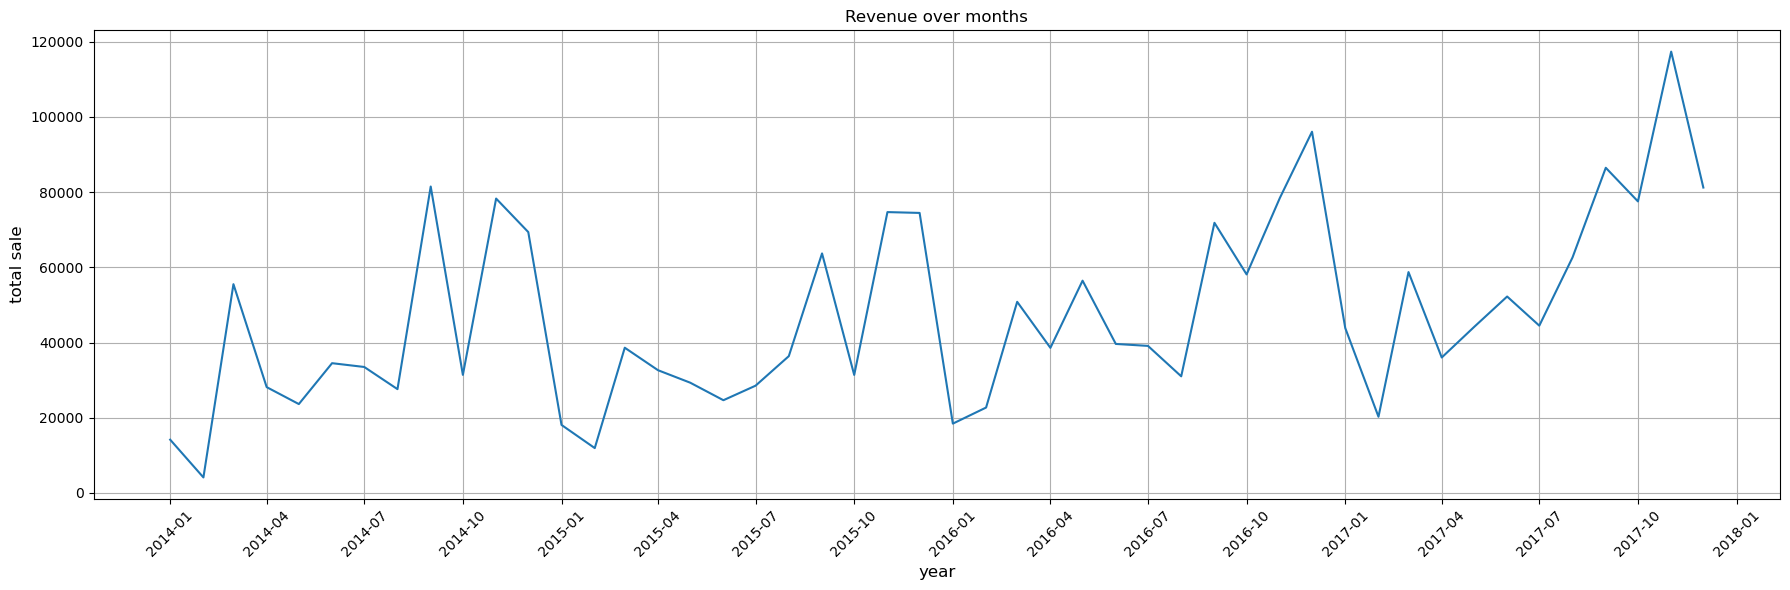

In [31]:
plt.figure(figsize=(18,6))
plt.plot(df1["date"],df1["total_sales"])
plt.title("Revenue over months",fontsize=12)
plt.xlabel("year",fontsize=12)
plt.ylabel("total sale",fontsize=12)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


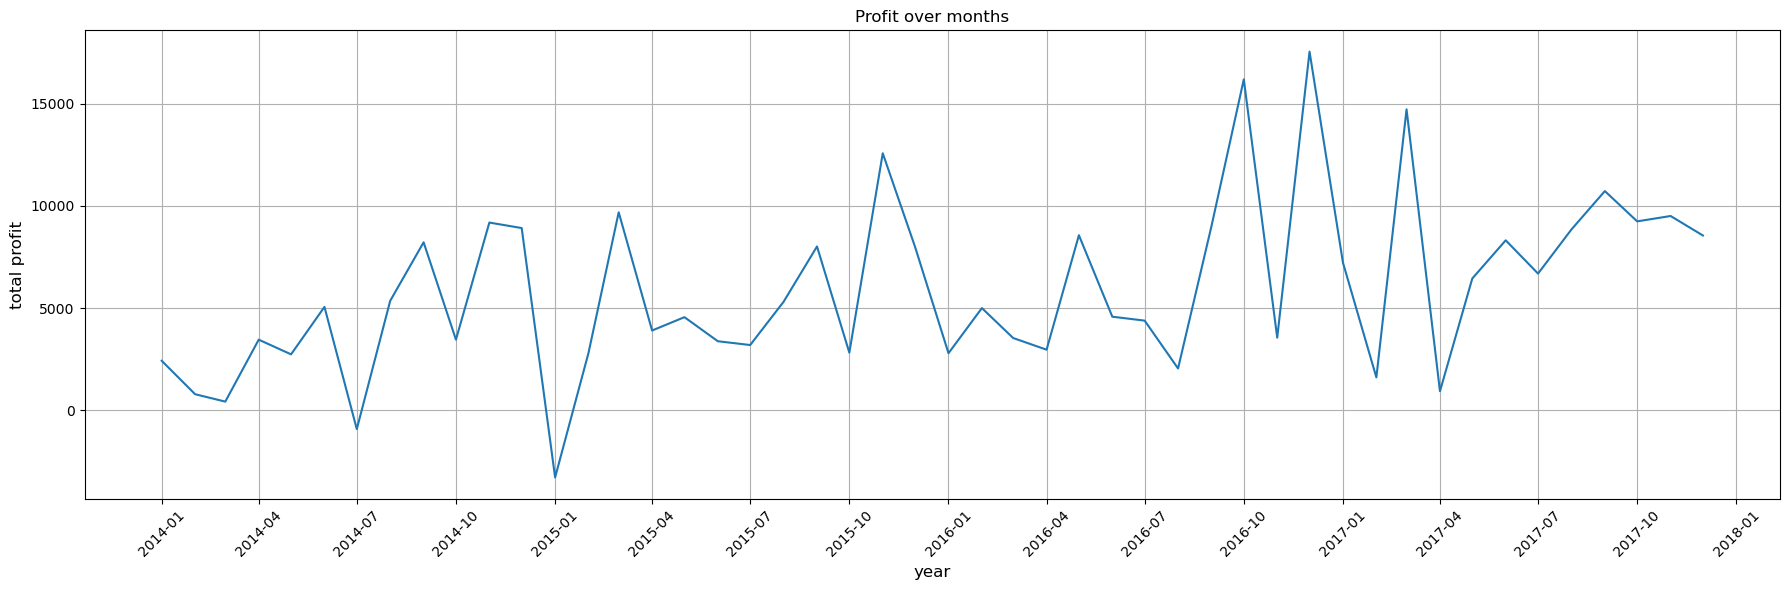

In [32]:
plt.figure(figsize=(18,6))
plt.plot(df1["date"],df1["total_profit"])
plt.title("Profit over months",fontsize=12)
plt.xlabel("year",fontsize=12)
plt.ylabel("total profit",fontsize=12)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
query="""
select category , sum(sales) from superstore group by category;
"""
df2=pd.read_sql_query(query,conn)
df2.head()

C:\Users\tanus\AppData\Local\Temp\ipykernel_17224\626986309.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2=pd.read_sql_query(query,conn)


,category,sum(sales)
0,Furniture,733047.06
1,Office Supplies,703502.87
2,Technology,835900.14


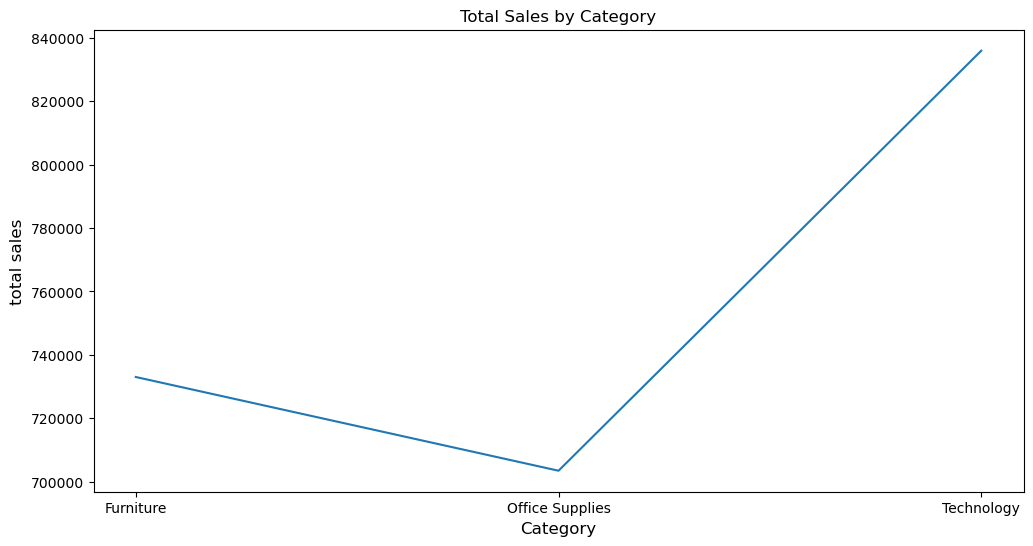

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df2["category"],df2["sum(sales)"])
plt.title("Total Sales by Category",fontsize=12)
plt.xlabel("Category",fontsize=12)
plt.ylabel("total sales",fontsize=12)
plt.show()

In [38]:
query="""
select category , sum(profit) from superstore group by category;
"""
df3=pd.read_sql_query(query,conn)
df3

C:\Users\tanus\AppData\Local\Temp\ipykernel_17224\834610083.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3=pd.read_sql_query(query,conn)


,category,sum(profit)
0,Furniture,16980.72
1,Office Supplies,120489.93
2,Technology,145387.81


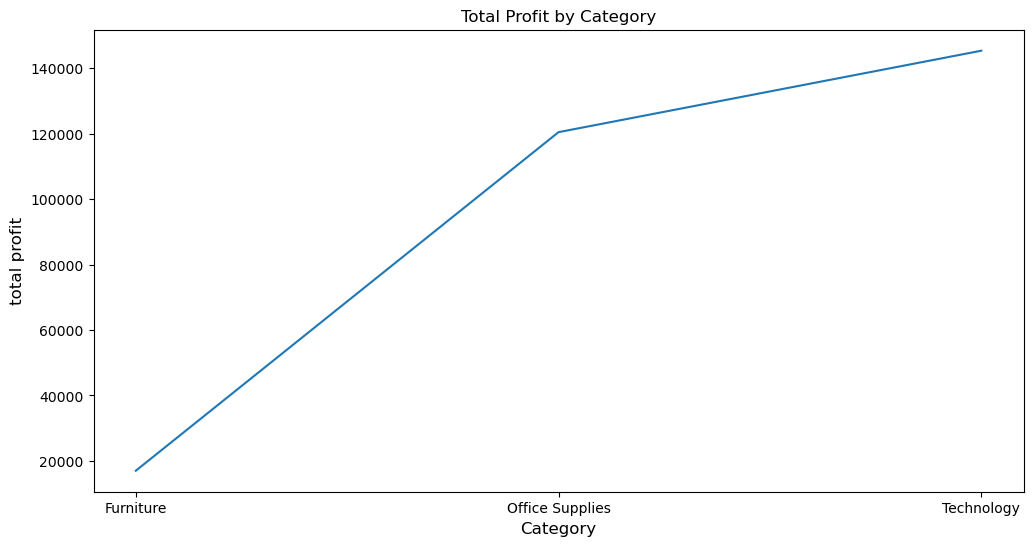

In [40]:
plt.figure(figsize=(12,6))
plt.plot(df3["category"],df3["sum(profit)"])
plt.title("Total Profit by Category",fontsize=12)
plt.xlabel("Category",fontsize=12)
plt.ylabel("total profit",fontsize=12)
plt.show()

In [42]:
query="""
SELECT Sub_Category, SUM(Profit)
FROM superstore
GROUP BY Sub_Category
ORDER BY SUM(Profit) DESC;
"""
df4=pd.read_sql_query(query,conn)
df4

C:\Users\tanus\AppData\Local\Temp\ipykernel_17224\4046355269.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4=pd.read_sql_query(query,conn)


,Sub_Category,SUM(Profit)
0,Copiers,55617.90
1,Phones,44448.40
2,Accessories,41936.78
3,Paper,32711.97
4,Binders,29982.84
5,Chairs,26590.15
6,Storage,21528.13
7,Appliances,18138.07
8,Furnishings,11588.72
9,Art,6527.96


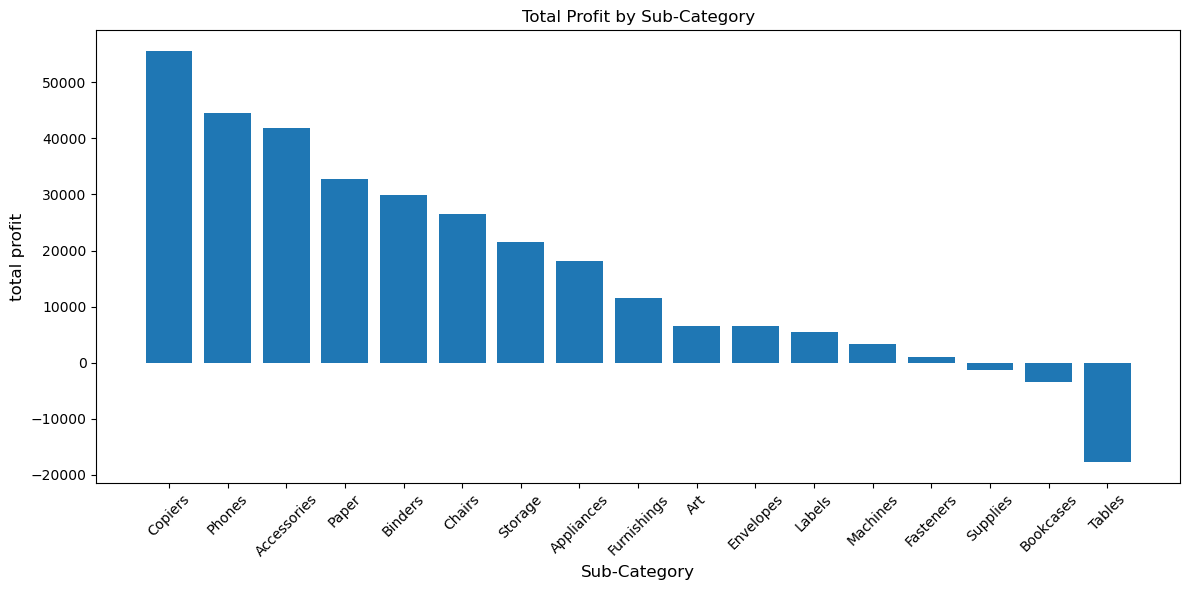

In [44]:
plt.figure(figsize=(12,6))
plt.bar(df4["Sub_Category"],df4["SUM(Profit)"])
plt.title("Total Profit by Sub-Category",fontsize=12)
plt.xlabel("Sub-Category",fontsize=12)
plt.ylabel("total profit",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\tanus\AppData\Local\Temp\ipykernel_17224\88638146.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5=pd.read_sql_query(query,conn)


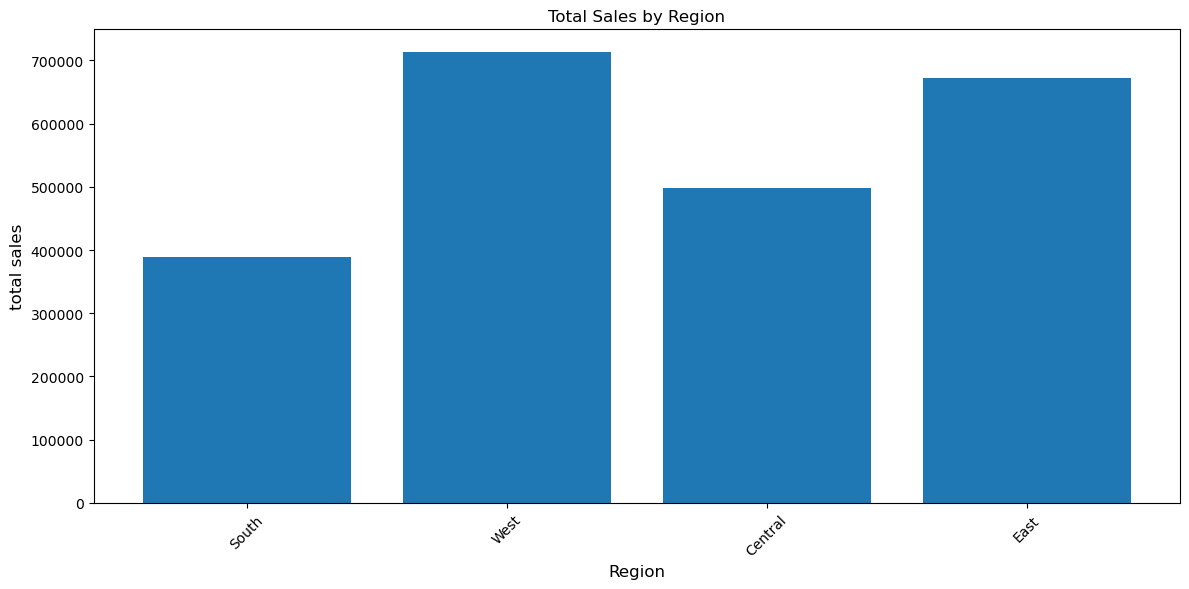

In [46]:
query="""
select region ,sum(sales),sum(profit) from superstore group by region;
"""
df5=pd.read_sql_query(query,conn)

plt.figure(figsize=(12,6))
plt.bar(df5["region"],df5["sum(sales)"])
plt.title("Total Sales by Region",fontsize=12)
plt.xlabel("Region",fontsize=12)
plt.ylabel("total sales",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


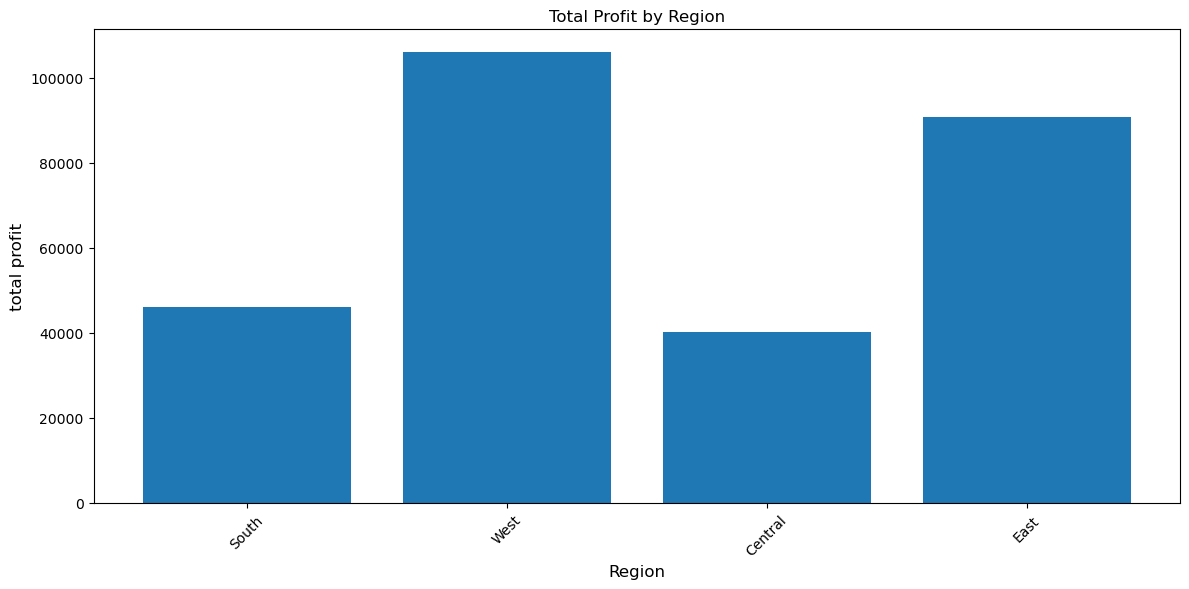

In [47]:
plt.figure(figsize=(12,6))
plt.bar(df5["region"],df5["sum(profit)"])
plt.title("Total Profit by Region",fontsize=12)
plt.xlabel("Region",fontsize=12)
plt.ylabel("total profit",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()